In [1]:
import requests
import pandas as pd
import numpy as np
import findspark
import pandas as pd
import numpy as np
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import*
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, BooleanType, DoubleType
from pyspark import SparkContext
from pyspark.sql.functions import monotonically_increasing_id
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession.builder.appName("Self_Employed_Approval").getOrCreate()

In [3]:
query= "(WITH    \
        total_applications AS (SELECT self_employed, COUNT(*) AS total \
         FROM cdw_sapp_loan_application \
        GROUP BY self_employed),  \
        approved_applications AS  \
        (SELECT self_employed, COUNT(*) AS SUM1 \
         FROM cdw_sapp_loan_application \
         WHERE application_status = 'Y' \
         GROUP BY self_employed)  \
       SELECT approved_applications.self_employed, \
       round((approved_applications.SUM1 / total_applications.total) * 100, 2) AS approval_percentage \
        FROM total_applications \
        INNER JOIN approved_applications ON approved_applications.self_employed = total_applications.self_employed) as self_e"

sdf_selfe = spark.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
                                     user="root",\
                                     password="password",\
                                     url="jdbc:mysql://localhost:3306/capstone_project",\
                                     dbtable=query).load()

sdf_selfe.show()

+-------------+-------------------+
|self_employed|approval_percentage|
+-------------+-------------------+
|           No|              68.25|
|          Yes|              65.71|
+-------------+-------------------+



In [4]:
#Convert spark dataframe to pandas dataframe
pdf_selfe = sdf_selfe.toPandas()
pdf_selfe.set_index('self_employed', inplace = True)
print(pdf_selfe['approval_percentage'].dtype)
pdf_selfe["approval_percentage"] = pdf_selfe["approval_percentage"].astype(float)
pdf_selfe

object


,approval_percentage
self_employed,
No,68.25
Yes,65.71


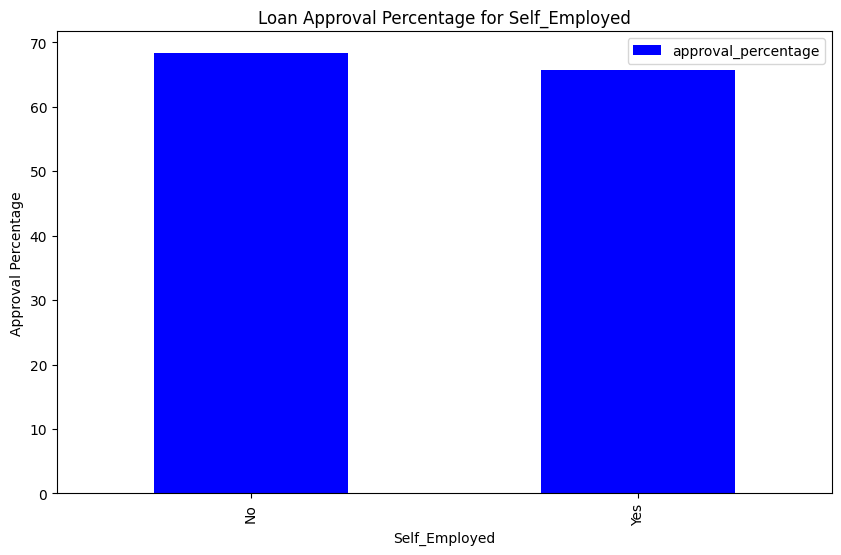

In [5]:
pdf_selfe.plot(kind='bar', figsize=(10, 6), color = 'blue')
plt.xlabel('Self_Employed')
plt.ylabel('Approval Percentage')
plt.title('Loan Approval Percentage for Self_Employed')
plt.show()

In [6]:
spark.stop()